Описание задачи
======
Мы владеем сетью магазинов, в которых продаются различные товары. Наши сотрудники собрали датасет из 8523 продаж товаров в различных магазинах нашей сети. Наша задача построить модель, предсказывающую продажи каждого продукта в конкретном магазине. Используя эту модель, попробовать выявить факторы, больше всего влияющие на увеличение продаж. Описание датасета:

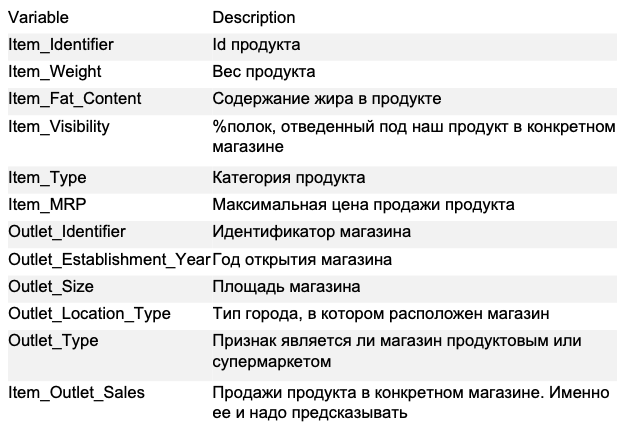

In [2]:
Image("csv_desrc.png")

In [35]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Загружаем датасет
======

In [41]:
data_original = pd.read_csv('data.csv')
data_original.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
data = data_original.copy()

EDA
=====

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Есть пустые значения у призанков Item_Weight и Outlet_Size, далее исправим это

In [44]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Заполним пропущенные признаки средним значением

In [45]:
#data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace= True)
# не стал использовать среднюю, иначе на графике pairplot большой акцент на этом значении
data['Item_Weight'].interpolate(inplace= True)

In [46]:
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [47]:
data['Outlet_Size'].fillna('Medium', inplace= True)

Пустых признаков больше нет

In [48]:
['Ok' for x in data.isnull().any() if x == False ]

['Ok', 'Ok', 'Ok', 'Ok', 'Ok', 'Ok', 'Ok', 'Ok', 'Ok', 'Ok', 'Ok', 'Ok']

Числовые признаки
=====

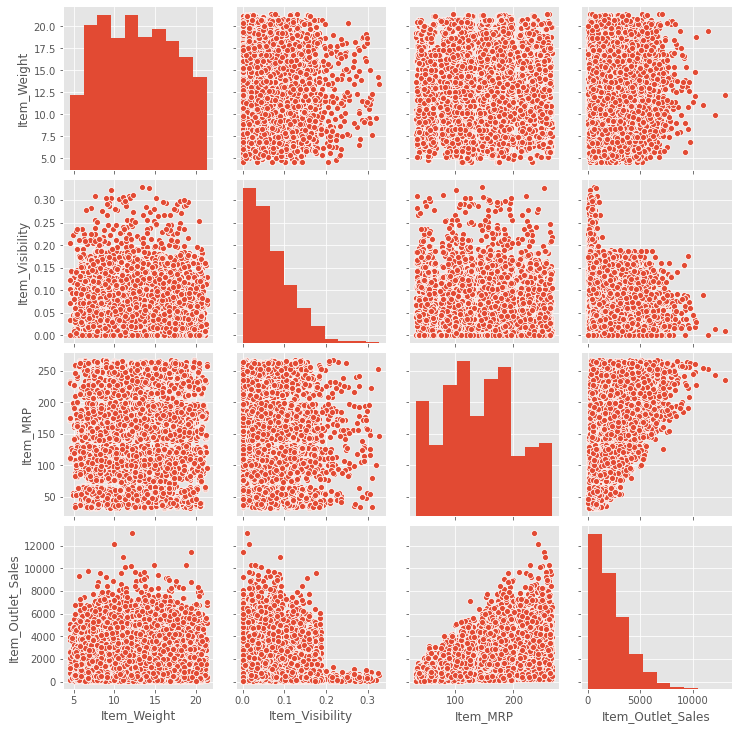

In [49]:
number_columns = [ *data.select_dtypes(['int64', 'float64']).columns ]
number_columns.remove('Outlet_Establishment_Year')

sns.pairplot(data[number_columns])

Посмотрим продажи более детально

In [59]:
number_columns.remove('Item_Outlet_Sales')

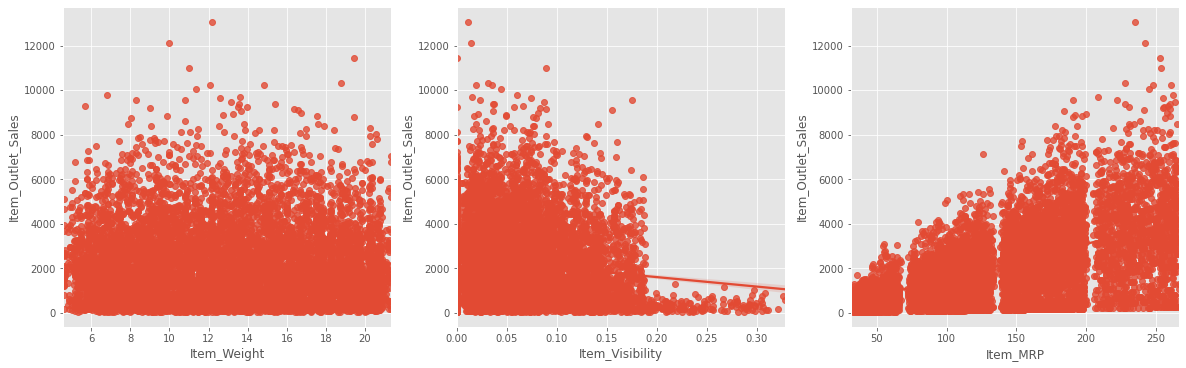

In [66]:
plt.figure(figsize= (20, 20))
place = 1
for i in number_columns:
    plt.subplot(3, 3, place)
    sns.regplot(x = i, y = 'Item_Outlet_Sales', data = data)
    place += 1

Вывод
=====
Из графиков видно что вес не имеет значение

Продажи резко падают при видимости 0.2 и больше

А вот максимальная цена продажи имеет высокую корреляцию с продажами

Посмотрим нечисловые признаки
====

In [67]:
object_columns = [ *data.select_dtypes('object').columns ]

In [68]:
object_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [74]:
for i in object_columns:
    print(i,':\n')
    print(data[i].value_counts())
    print('_'*20,'\n')

Item_Identifier :

FDG33    10
FDW13    10
FDV38     9
FDP25     9
FDU12     9
         ..
FDE52     1
FDC23     1
FDY43     1
DRF48     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64
____________________ 

Item_Fat_Content :

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
____________________ 

Item_Type :

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
____________________ 

Outlet_Identifier :

OUT027    935
OUT013    932
OUT035    930
OUT049 

Приведем значения признака Item_Fat_Content к единому виду

In [75]:
data['Item_Fat_Content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace= True)

В Item_Identifier много уникальных значений - возьмем первую букву

In [77]:
def letter_1(s):
    return s[:1]

In [78]:
data['Item_Identifier'] = data['Item_Identifier'].apply(letter_1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,F,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,D,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,F,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,F,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,N,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


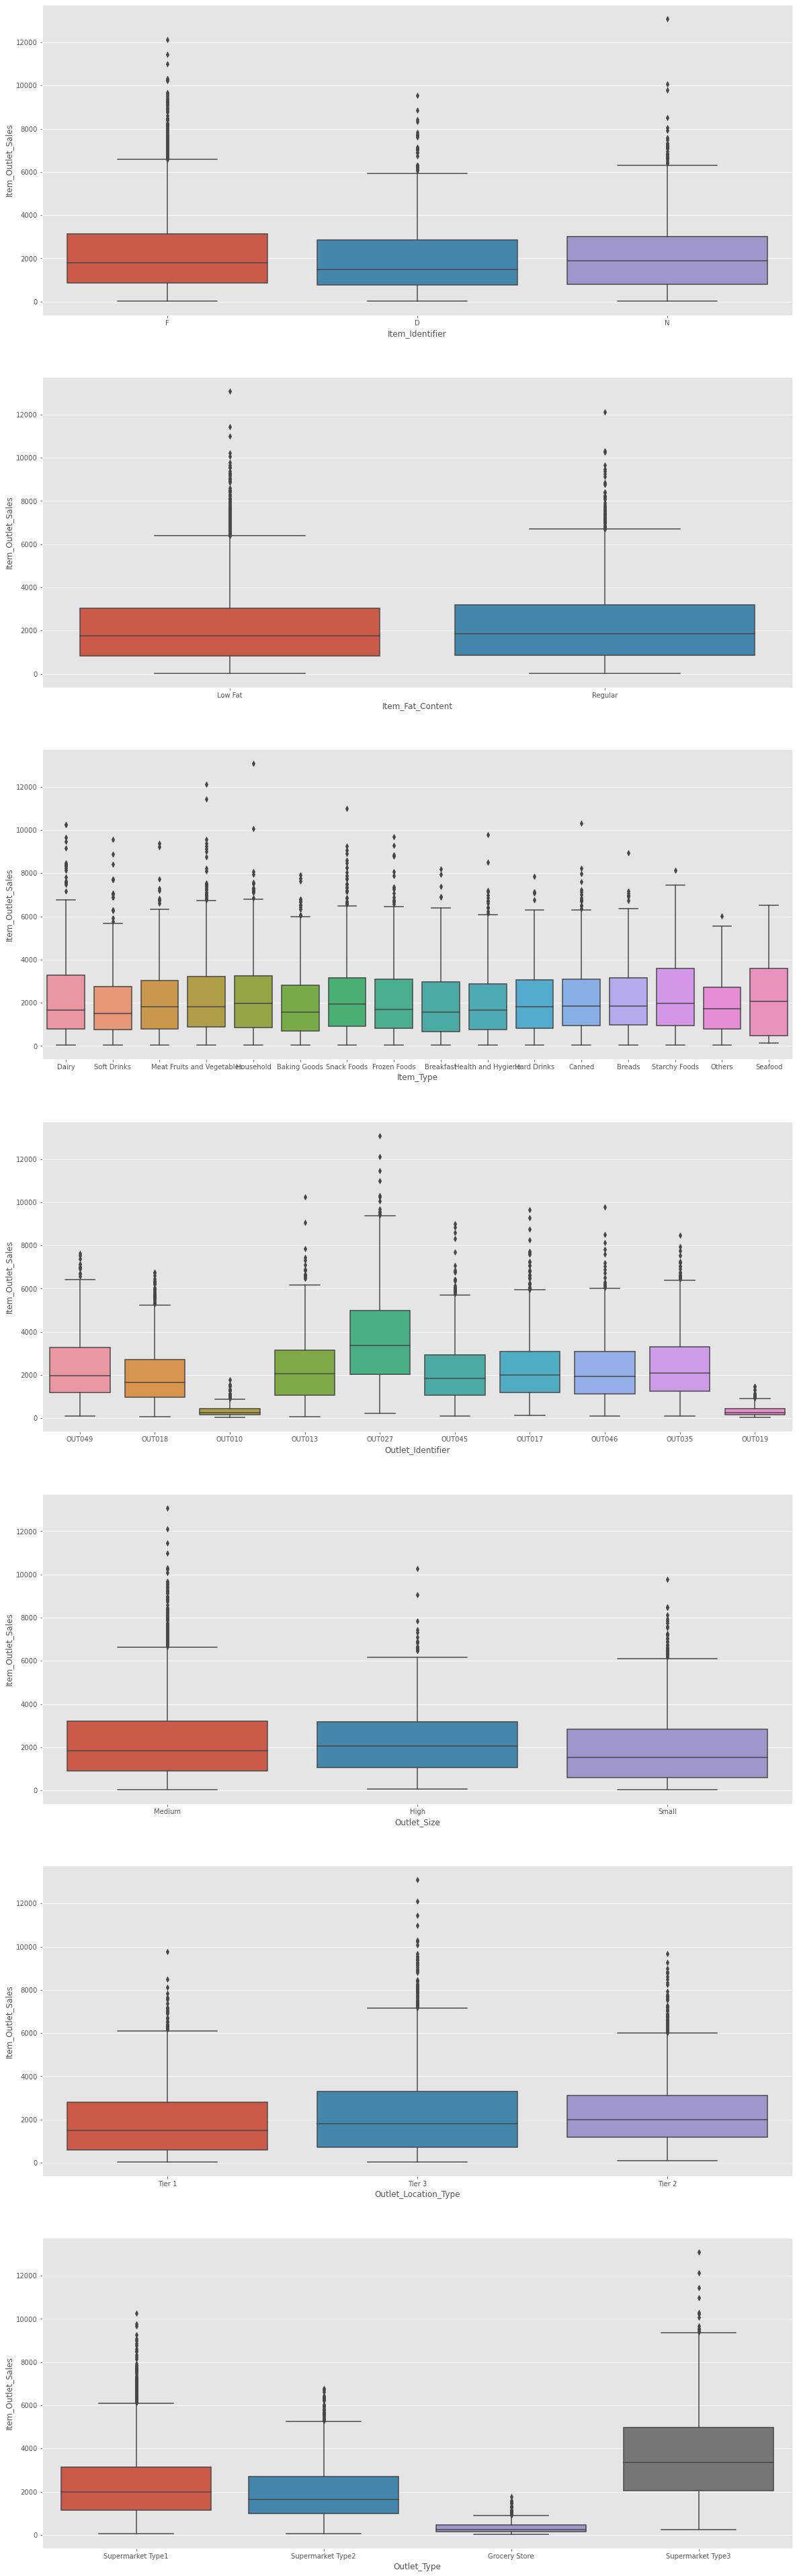

In [93]:
plt.figure(figsize= (20, 90))
place = 1
for i in object_columns:
    plt.subplot(9, 1, place)
    sns.boxplot(i, 'Item_Outlet_Sales', data = data)
    place += 1

Переведем категориальные переменные в числовые

In [94]:
new_data = pd.get_dummies(data, drop_first = True)

In [96]:
new_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_F,Item_Identifier_N,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [103]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Identifier_F                8523 non-null   uint8  
 6   Item_Identifier_N                8523 non-null   uint8  
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

Разделим датасет на тестовую и обучающую выборку
======

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [116]:
X = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=['Item_Outlet_Sales']), 
    X['Item_Outlet_Sales'], 
    test_size=0.15
)

Линейная модель
=====

In [121]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

In [122]:
params = {
    'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha' : list(np.arange(0.00001, 0.1, 0.001)),
    'max_iter' : [100, 300, 500, 700, 1000, 2000]    
}

In [135]:
rand_sgd = RandomizedSearchCV(SGDRegressor(), params, cv=10, random_state=5, n_iter=30, n_jobs=-1)
rand_sgd = rand_sgd.fit(X_train, y_train).best_estimator_
rand_sgd

SGDRegressor(alpha=0.00501, max_iter=2000, penalty='elasticnet')

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# для оценки модели регрессии лучше использовать корень среднеквадратичной ошибки и среднюю абсолютную ошибку
print('RMSE: ', np.sqrt(mean_squared_error(y_test, rand_sgd.predict(X_test))))
print('MAE: ', mean_absolute_error(y_test, rand_sgd.predict(X_test)))

RMSE: 0.6958508419319762
MAE: 0.522305031416487


In [130]:
#влияние на целевую переменную 
pd.Series(
    rand_sgd.coef_, 
    index = new_data.drop(columns=['Item_Outlet_Sales']).columns
).abs().sort_values(ascending=False).head(5)

Item_MRP                         0.550672
Outlet_Type_Supermarket Type1    0.305909
Outlet_Type_Supermarket Type3    0.298277
Outlet_Identifier_OUT027         0.298277
Outlet_Type_Supermarket Type2    0.119477
dtype: float64

Нелинейная модель
=====

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
params = {   
    'criterion' : ['mse', 'mae'],
    'max_depth' : list(range(2, 20, 2)),
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : list(range(1, 10, 1)),
    'min_samples_split' : list(range(2, 10, 1)),
    'n_estimators' : list(range(10, 100, 10))
}

In [141]:
random_forest_reg = RandomizedSearchCV(RandomForestRegressor(), params, cv=10, random_state=13, n_iter=10, n_jobs=-1)
random_forest_reg = random_forest_reg.fit(X_train, y_train).best_estimator_
random_forest_reg

RandomForestRegressor(criterion='mae', max_depth=10, min_samples_split=7,
                      n_estimators=80)

In [142]:
# для оценки модели регрессии лучше использовать корень среднеквадратичной ошибки и среднюю абсолютную ошибку
print('RMSE: ', np.sqrt(mean_squared_error(y_test, random_forest_reg.predict(X_test))))
print('MAE: ', mean_absolute_error(y_test, random_forest_reg.predict(X_test)))

RMSE:  0.6832141075811562
MAE:  0.4816235926018845


In [144]:
#влияние на целевую переменную
pd.Series(
    random_forest_reg.feature_importances_, 
    index = new_data.drop(columns=['Item_Outlet_Sales']).columns
).abs().sort_values(ascending=False).head(5)

Item_MRP                         0.476282
Outlet_Identifier_OUT019         0.141412
Outlet_Establishment_Year        0.064914
Outlet_Type_Supermarket Type1    0.059959
Item_Visibility                  0.043175
dtype: float64

ИТОГ
======

На целевую переменную больше всего влияния оказывет признак Item_MRP (максимальная цена продажи продукта), 
далее Outlet_type (тип магазина), а также идентификатор магазина.